In [1]:
from gsea import *

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'c2.cp.kegg.v6.2.symbols.filtered.gmt',
 'GSE25628_filtered_expression.txt',
 'GSE25628_samples.txt',
 'gsea.py',
 'knn.py',
 'Project 2.zip',
 'quizzes.ipynb',
 'README.md',
 '__pycache__']

In [3]:
gsea = GSEA()
gsea.load_data('GSE25628_filtered_expression.txt', 'GSE25628_samples.txt', 'c2.cp.kegg.v6.2.symbols.filtered.gmt')

In [5]:
gsea.get_gene_rank_order()

['PTGIS',
 'CNN1',
 'TAGLN',
 'C7',
 'ACTG2',
 'TCF21',
 'WISP2',
 'FOS',
 'FOSB',
 'KCNMB1',
 'ACKR1',
 'PDLIM3',
 'GPC3',
 'MYL9',
 'DPT',
 'AQP1',
 'FZD7',
 'MYH11',
 'ACTA2',
 'TCEAL2',
 'CCL14',
 'SYNPO',
 'KLF2',
 'AOC3',
 'FMO1',
 'DES',
 'MT1M',
 'IGFBP6',
 'MGP',
 'HOXC6',
 'EGR1',
 'MFAP4',
 'PLA2G2A',
 'MN1',
 'PCP4',
 'AEBP1',
 'FXYD1',
 'TPSB2',
 'ADIRF',
 'NBL1',
 'PDGFRL',
 'PLVAP',
 'BCHE',
 'SCRG1',
 'PLN',
 'WIF1',
 'BGN',
 'KCNK3',
 'PRELP',
 'PCOLCE2',
 'MMP23A',
 'MINOS1-NBL1',
 'LMOD1',
 'MMRN2',
 'CHRDL1',
 'CCL19',
 'MYLK',
 'PDE2A',
 'OLFML1',
 'CLU',
 'HSPB7',
 'CCL21',
 'GAS1',
 'EMILIN1',
 'ITM2A',
 'DPYSL3',
 'FABP4',
 'LTBP2',
 'SRPX2',
 'FBLN5',
 'FRZB',
 'ASPN',
 'HSPB6',
 'JAM2',
 'DKK3',
 'RAMP3',
 'SFRP1',
 'THBS2',
 'FEZ1',
 'IGFBP4',
 'CYR61',
 'SELP',
 'CPE',
 'CA11',
 'PTRF',
 'CXCL12',
 'FMOD',
 'CFD',
 'MFAP5',
 'COMP',
 'FXYD6',
 'PAMR1',
 'CRYAB',
 'C3',
 'SRPX',
 'SMTN',
 'SYNM',
 'COL6A2',
 'LIMS2',
 'PAEP',
 'SOX18',
 'CDH3',
 'PTGER3',
 'N

In [6]:
pos_index = list(gsea.sampfile[gsea.sampfile[1] == 1].index)
neg_index = list(gsea.sampfile[gsea.sampfile[1] == 0].index)

In [7]:
pos_mean = np.mean(gsea.expfile.iloc[:, pos_index], axis=1)
neg_mean = np.mean(gsea.expfile.iloc[:, neg_index], axis=1)

In [8]:
pos_index

[6, 7, 8, 9, 10, 11, 12]

In [9]:
neg_index


[0, 1, 2, 3, 4, 5]

In [10]:
(pos_mean - neg_mean).loc['BMP4']

-1.220663382380951

In [2]:
from knn import *

In [3]:
knn = KNN('GSE25628_filtered_expression.txt', 'GSE25628_samples.txt')
fn_lst = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
metric_lst = []
for fn in fn_lst:
    metric_lst.append(knn.calc_metrics(k=3, fn=fn))

In [4]:
metric_lst

[[0.86, 0.17],
 [0.86, 0.17],
 [0.86, 0.17],
 [0.86, 1.0],
 [0.71, 1.0],
 [0.71, 1.0],
 [0.0, 1.0]]

In [5]:
curve_stat = [[i[0], 1-i[1]] for i in metric_lst]
curve_stat

[[0.86, 0.83],
 [0.86, 0.83],
 [0.86, 0.83],
 [0.86, 0.0],
 [0.71, 0.0],
 [0.71, 0.0],
 [0.0, 0.0]]

In [13]:
import matplotlib.pyplot as plt

In [7]:
!pip install seaborn

In [14]:
import pandas as pd
curve_df = pd.DataFrame(curve_stat)
curve_df.columns = ['x', 'y']
curve_df

,x,y
0,0.86,0.83
1,0.86,0.83
2,0.86,0.83
3,0.86,0.00
4,0.71,0.00
5,0.71,0.00
6,0.00,0.00


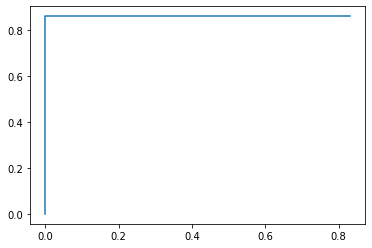

In [18]:
plt.plot(curve_df['y'].values, curve_df['x'].values)

In [20]:
k_lst = [1,2,3,4,5,6]
fn = 0.5
for k in k_lst:
    print(knn.get_assignments(k=k, fn=fn))

[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [4]:
geneset_names = [i[0] for i in gsea.genesets]
scores = []
for gs in geneset_names:
    scores.append(gsea.get_enrichment_score(gs))

In [30]:
np.argmax(scores)

87

In [31]:
geneset_names[87]


'KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION'

In [5]:
gene_lst = []
for gene_set in gsea.genesets:
    gene_lst += gene_set[2:]
gene_lst

['ACSS2',
 'GCK',
 'PGK2',
 'PGK1',
 'PDHB',
 'PDHA1',
 'PDHA2',
 'PGM2',
 'TPI1',
 'ACSS1',
 'FBP1',
 'ADH1B',
 'HK2',
 'ADH1C',
 'HK1',
 'HK3',
 'ADH4',
 'PGAM2',
 'ADH5',
 'PGAM1',
 'ADH1A',
 'ALDOC',
 'ALDH7A1',
 'LDHAL6B',
 'PKLR',
 'LDHAL6A',
 'ENO1',
 'PKM2',
 'PFKP',
 'BPGM',
 'PCK2',
 'PCK1',
 'ALDH1B1',
 'ALDH2',
 'ALDH3A1',
 'AKR1A1',
 'FBP2',
 'PFKM',
 'PFKL',
 'LDHC',
 'GAPDH',
 'ENO3',
 'ENO2',
 'PGAM4',
 'ADH7',
 'ADH6',
 'LDHB',
 'ALDH1A3',
 'ALDH3B1',
 'ALDH3B2',
 'ALDH9A1',
 'ALDH3A2',
 'GALM',
 'ALDOA',
 'DLD',
 'DLAT',
 'ALDOB',
 'G6PC2',
 'LDHA',
 'G6PC',
 'PGM1',
 'GPI',
 'IDH3B',
 'DLST',
 'PCK2',
 'CS',
 'PDHB',
 'PCK1',
 'PDHA1',
 'LOC642502',
 'PDHA2',
 'LOC283398',
 'FH',
 'SDHD',
 'OGDH',
 'SDHB',
 'IDH3A',
 'SDHC',
 'IDH2',
 'IDH1',
 'ACO1',
 'ACLY',
 'MDH2',
 'DLD',
 'MDH1',
 'DLAT',
 'OGDHL',
 'PC',
 'SDHA',
 'SUCLG1',
 'SUCLA2',
 'SUCLG2',
 'IDH3G',
 'ACO2',
 'RPE',
 'RPIA',
 'PGM2',
 'PGLS',
 'PRPS2',
 'FBP2',
 'PFKM',
 'PFKL',
 'TALDO1',
 'TKT',
 'FBP1

In [6]:
len(set(gene_lst))

4991

In [9]:
from collections import Counter
gene_count = Counter(gene_lst)

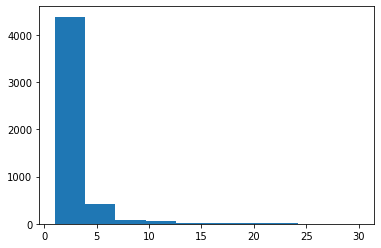

In [14]:
list(gene_count.values())
plt.hist(list(gene_count.values()))
plt.show()

In [16]:
max(gene_count.values())

30

In [17]:
for key in gene_count.keys():
    if gene_count[key] == 30:
        print(key)


MAPK3
MAPK1
